In [622]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

In [623]:
data = pd.read_csv("../Dataset/Jin2017/data.csv")

In [624]:
threshold = 1000

In [625]:
data

,miRNA,CON-1,CON-2,CON-3,CON-4,CON-5,CON-6,CON-7,CON-8,CON-9,...,SCC-1,SCC-2,SCC-3,SCC-4,SCC-5,SCC-6,SCC-7,SCC-8,SCC-9,SCC-10
0,hsa-let-7a-2-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hsa-let-7a-3p,6.515507,20.902514,146.033115,37.015298,38.090595,61.473678,43.168806,327.037377,78.165009,...,493.047263,57.930362,NaN,181.093807,50.519084,NaN,216.702332,419.435135,NaN,NaN
2,hsa-let-7a-5p,43745.113370,36244.959390,27806.095840,131369.054900,59179.724490,68309.209180,90409.706310,22878.016520,25276.946710,...,140433.727500,56908.957860,11081.226470,42919.232160,33363.644780,31264.367820,153154.373300,95433.252970,28009.800650,77704.276050
3,hsa-let-7b-3p,NaN,29.376506,18.080290,49.353731,47.885319,20.491226,45.621579,119.719040,NaN,...,15.407727,7.622416,NaN,NaN,4.209924,NaN,NaN,90.158954,NaN,2.572989
4,hsa-let-7b-5p,NaN,NaN,NaN,NaN,6.529816,0.853801,14.226084,NaN,NaN,...,1779.592466,6640.648820,2187.556034,20825.787760,2117.591587,37547.892720,5444.646098,1177.946336,7406.169952,25.729893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,hsa-miR-98-5p,794.891843,2339.386777,720.430033,6058.170422,2076.481561,2440.163486,4308.541194,129.938958,21.562761,...,1394.399291,97.566925,NaN,362.187613,269.435112,459.770115,2464.989029,1993.296878,111.370977,18.010925
952,hsa-miR-99a-3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,hsa-miR-99a-5p,45.608548,142.363069,267.031981,31.727398,204.600909,197.228049,257.050619,998.631991,1126.654268,...,92.446362,105.189341,NaN,NaN,54.729007,613.026820,27.087792,35.279591,NaN,NaN
954,hsa-miR-99b-3p,13.031014,10.168791,130.734408,NaN,1.088303,25.614032,37.282151,8.759930,21.562761,...,NaN,NaN,NaN,181.093807,NaN,NaN,NaN,NaN,NaN,NaN


In [626]:
table = data.iloc[:, 1:].transpose()
mirnas = data.iloc[:, 0]

In [627]:
controls = np.array(["CON" in k for k in data.columns[1:]])
sick = 1 - controls

In [628]:
controls

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [629]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,946,947,948,949,950,951,952,953,954,955
CON-1,NaN,6.515507,43745.11337,NaN,NaN,NaN,4626.009904,78.186083,4684.649466,NaN,...,NaN,286.682304,299.713318,32.577535,13.031014,794.891843,NaN,45.608548,13.031014,3570.497785
CON-2,NaN,20.902514,36244.95939,29.376506,NaN,NaN,3909.899996,329.920763,11702.583210,4.519463,...,NaN,16.947984,3.954530,NaN,2.259731,2339.386777,NaN,142.363069,10.168791,11889.575970
CON-3,NaN,146.033115,27806.09584,18.080290,NaN,NaN,2008.303026,94.573827,3182.131110,26.425040,...,NaN,891.497396,1546.560225,8.344749,5.563166,720.430033,NaN,267.031981,130.734408,14282.038620
CON-4,NaN,37.015298,131369.05490,49.353731,NaN,NaN,4877.206156,505.875738,51985.341940,8.813166,...,NaN,NaN,NaN,NaN,3.525266,6058.170422,NaN,31.727398,NaN,3371.917375
CON-5,NaN,38.090595,59179.72449,47.885319,6.529816,2.176605,107596.135200,452.733925,34343.568460,3.264908,...,NaN,1.088303,1.088303,NaN,8.706422,2076.481561,NaN,204.600909,1.088303,5945.397677


In [630]:
table = table.fillna(1e-6)
mask = table.mean() > (threshold + 1e-6)
table = table.loc[:, mask]
mirnas = mirnas[mask]

In [631]:
table.std().min()

570.1516059762126

In [632]:
table.head()

,2,4,6,7,8,10,13,17,33,42,...,623,719,776,787,894,898,930,931,941,955
CON-1,43745.11337,0.000001,4626.009904,78.186083,4684.649466,7010.685431,2984.102163,6.515507,12879.854053,32.577535,...,2058.900182,5785.770133,1237.946312,162.887673,8691.686213,1022.934584,3010.164191,40761.011210,273.651290,3570.497785
CON-2,36244.95939,0.000001,3909.899996,329.920763,11702.583210,5962.300904,2820.144600,251.960034,11802.769527,3.389597,...,50.279020,1811.174597,216.369267,295.459861,5421.095269,12.993455,633.289683,4514.943038,2.824664,11889.575970
CON-3,27806.09584,0.000001,2008.303026,94.573827,3182.131110,4657.760965,4928.965321,83.447494,15898.347044,23.643457,...,2009.693817,2862.249049,2994.374248,852.555232,11597.810890,515.983672,2101.486061,49944.716040,756.590614,14282.038620
CON-4,131369.05490,0.000001,4877.206156,505.875738,51985.341940,18026.450070,13274.390880,650.411663,12594.007400,5.287900,...,14.101066,9685.669616,352.526647,149.823825,6012.341958,31.727398,1216.216931,8633.377575,0.000001,3371.917375
CON-5,59179.72449,6.529816,107596.135200,452.733925,34343.568460,9998.236950,7929.373508,386.347460,15476.339211,11.971330,...,119.713297,6584.231364,348.256866,0.000001,4595.902323,114.271784,0.000001,2247.345086,9.794724,5945.397677


### T-test

In [633]:
X = table

In [634]:
X

,2,4,6,7,8,10,13,17,33,42,...,623,719,776,787,894,898,930,931,941,955
CON-1,43745.113370,0.000001,4626.009904,78.186083,4684.649466,7010.685431,2984.102163,6.515507,12879.854053,32.577535,...,2058.900182,5785.770133,1237.946312,162.887673,8691.686213,1022.934584,3010.164191,40761.011210,273.651290,3570.497785
CON-2,36244.959390,0.000001,3909.899996,329.920763,11702.583210,5962.300904,2820.144600,251.960034,11802.769527,3.389597,...,50.279020,1811.174597,216.369267,295.459861,5421.095269,12.993455,633.289683,4514.943038,2.824664,11889.575970
CON-3,27806.095840,0.000001,2008.303026,94.573827,3182.131110,4657.760965,4928.965321,83.447494,15898.347044,23.643457,...,2009.693817,2862.249049,2994.374248,852.555232,11597.810890,515.983672,2101.486061,49944.716040,756.590614,14282.038620
CON-4,131369.054900,0.000001,4877.206156,505.875738,51985.341940,18026.450070,13274.390880,650.411663,12594.007400,5.287900,...,14.101066,9685.669616,352.526647,149.823825,6012.341958,31.727398,1216.216931,8633.377575,0.000001,3371.917375
CON-5,59179.724490,6.529816,107596.135200,452.733925,34343.568460,9998.236950,7929.373508,386.347460,15476.339211,11.971330,...,119.713297,6584.231364,348.256866,0.000001,4595.902323,114.271784,0.000001,2247.345086,9.794724,5945.397677
CON-6,68309.209180,0.853801,95951.019140,220.280679,35058.779940,11871.250210,8590.946464,498.619831,24233.999554,5.122806,...,189.543840,6202.011043,517.403454,3.415204,6345.449624,94.771920,0.853801,2028.631365,17.076022,3934.315375
CON-7,90409.706310,14.226084,107926.921100,458.668566,38310.843860,15407.339380,17091.903940,900.658275,15309.272611,19.622185,...,195.731292,8669.081176,421.386415,0.000001,3226.377710,98.601478,0.000001,2943.327697,22.565512,2284.022293
CON-8,22878.016520,0.000001,2011.863865,1534.447694,7002.103843,3309.793455,1795.785598,2952.096324,14832.918806,0.000001,...,33312.552830,0.000001,4093.807168,1611.827073,0.000001,10701.714170,131077.748800,1838.125258,0.000001,534.355714
CON-9,25276.946710,0.000001,1609.121048,1013.449772,5703.350314,4266.731355,202.150885,940.675454,24501.276408,0.000001,...,56839.438290,8.086035,3142.772432,1565.995526,0.000001,27115.172100,124282.364400,1978.383332,0.000001,404.301771
CON-10,55403.353350,0.000001,4762.364323,55.147312,7578.816342,6343.910457,411.635295,289.523389,17269.543203,0.000001,...,24251.030570,7.878187,1034.012105,1758.805352,0.000001,13920.757250,58162.688510,218.619702,0.000001,35.451844


In [635]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [636]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [637]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [638]:
mirnas.iloc[lowest], pvalues

(373      hsa-miR-320b
 372      hsa-miR-320a
 161    hsa-miR-155-5p
 719    hsa-miR-574-5p
 283    hsa-miR-23a-3p
 Name: miRNA, dtype: object,
 array([1.88298507e-07, 2.00097883e-05, 2.03123643e-05, 3.61543973e-05,
        3.77260036e-05]))

### F-test

In [639]:
t3 = table

In [640]:
f, p = f_classif(t3, sick)

In [641]:
np.mean(p)

0.12902080505495558

### ANOVA

In [642]:
t3

,2,4,6,7,8,10,13,17,33,42,...,623,719,776,787,894,898,930,931,941,955
CON-1,43745.113370,0.000001,4626.009904,78.186083,4684.649466,7010.685431,2984.102163,6.515507,12879.854053,32.577535,...,2058.900182,5785.770133,1237.946312,162.887673,8691.686213,1022.934584,3010.164191,40761.011210,273.651290,3570.497785
CON-2,36244.959390,0.000001,3909.899996,329.920763,11702.583210,5962.300904,2820.144600,251.960034,11802.769527,3.389597,...,50.279020,1811.174597,216.369267,295.459861,5421.095269,12.993455,633.289683,4514.943038,2.824664,11889.575970
CON-3,27806.095840,0.000001,2008.303026,94.573827,3182.131110,4657.760965,4928.965321,83.447494,15898.347044,23.643457,...,2009.693817,2862.249049,2994.374248,852.555232,11597.810890,515.983672,2101.486061,49944.716040,756.590614,14282.038620
CON-4,131369.054900,0.000001,4877.206156,505.875738,51985.341940,18026.450070,13274.390880,650.411663,12594.007400,5.287900,...,14.101066,9685.669616,352.526647,149.823825,6012.341958,31.727398,1216.216931,8633.377575,0.000001,3371.917375
CON-5,59179.724490,6.529816,107596.135200,452.733925,34343.568460,9998.236950,7929.373508,386.347460,15476.339211,11.971330,...,119.713297,6584.231364,348.256866,0.000001,4595.902323,114.271784,0.000001,2247.345086,9.794724,5945.397677
CON-6,68309.209180,0.853801,95951.019140,220.280679,35058.779940,11871.250210,8590.946464,498.619831,24233.999554,5.122806,...,189.543840,6202.011043,517.403454,3.415204,6345.449624,94.771920,0.853801,2028.631365,17.076022,3934.315375
CON-7,90409.706310,14.226084,107926.921100,458.668566,38310.843860,15407.339380,17091.903940,900.658275,15309.272611,19.622185,...,195.731292,8669.081176,421.386415,0.000001,3226.377710,98.601478,0.000001,2943.327697,22.565512,2284.022293
CON-8,22878.016520,0.000001,2011.863865,1534.447694,7002.103843,3309.793455,1795.785598,2952.096324,14832.918806,0.000001,...,33312.552830,0.000001,4093.807168,1611.827073,0.000001,10701.714170,131077.748800,1838.125258,0.000001,534.355714
CON-9,25276.946710,0.000001,1609.121048,1013.449772,5703.350314,4266.731355,202.150885,940.675454,24501.276408,0.000001,...,56839.438290,8.086035,3142.772432,1565.995526,0.000001,27115.172100,124282.364400,1978.383332,0.000001,404.301771
CON-10,55403.353350,0.000001,4762.364323,55.147312,7578.816342,6343.910457,411.635295,289.523389,17269.543203,0.000001,...,24251.030570,7.878187,1034.012105,1758.805352,0.000001,13920.757250,58162.688510,218.619702,0.000001,35.451844


In [643]:
X = np.array(sick).reshape(-1, 1)

In [644]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [645]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.1598565340333034

### Mean-variance-plot

In [646]:
np.mean(table)

2      46164.583735
4      61166.174632
6      11001.905801
7       1074.840183
8      10467.564418
           ...     
898     6258.030515
930    20779.698421
931     8342.402842
941    52114.831348
955     1343.147791
Length: 89, dtype: float64

In [647]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [648]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

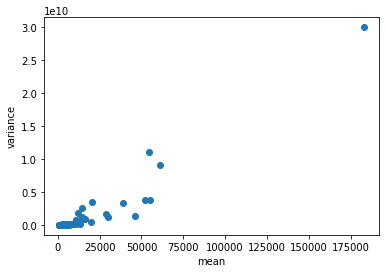

In [649]:
mean_variance_plot(table)

### Log transformation

In [650]:
log_table = np.log2(table)

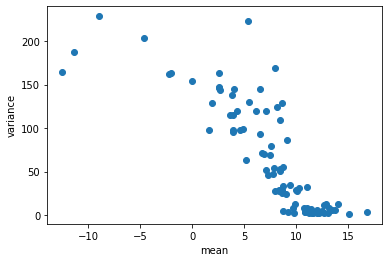

In [651]:
mean_variance_plot(log_table)

In [652]:
log_table.isna().sum().sum()

0

In [653]:
np.mean(log_table)

2      15.092050
4       5.388269
6      11.590341
7       7.753440
8      12.706701
         ...    
898    11.051065
930    -8.928467
931    12.155092
941     7.981495
955     3.949940
Length: 89, dtype: float64

In [654]:
norm_log_table = log_table - np.mean(log_table)

In [655]:
norm_log_table.isna().sum().sum()

0

In [656]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

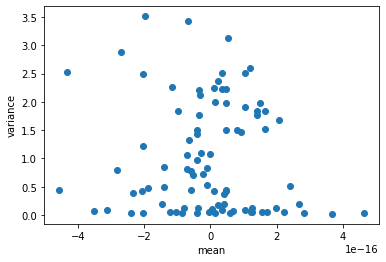

In [657]:
mean_variance_plot(norm_log_table)

### PCA

In [658]:
pca = decomposition.PCA(n_components=10)

In [659]:
norm_log_table.isna().sum().sum()

0

In [660]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [661]:
pca.explained_variance_ratio_

array([0.34321385, 0.24599637, 0.11992116, 0.05597519, 0.04495052,
       0.02900423, 0.02547212, 0.02295424, 0.01571763, 0.01252173])

In [662]:
components = pca.transform(norm_log_table)

In [663]:
components.shape

(38, 10)

In [664]:
sum(controls)

12

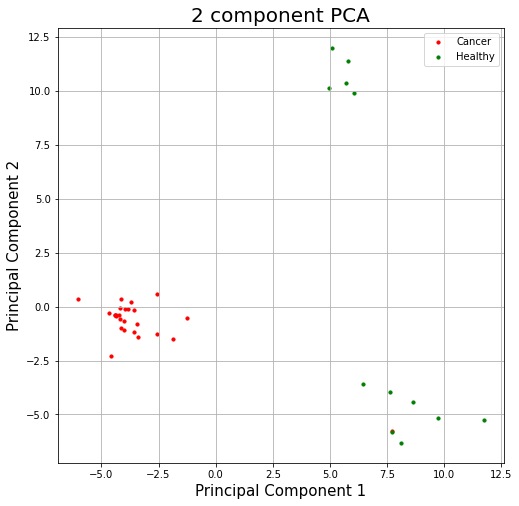

In [665]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [666]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

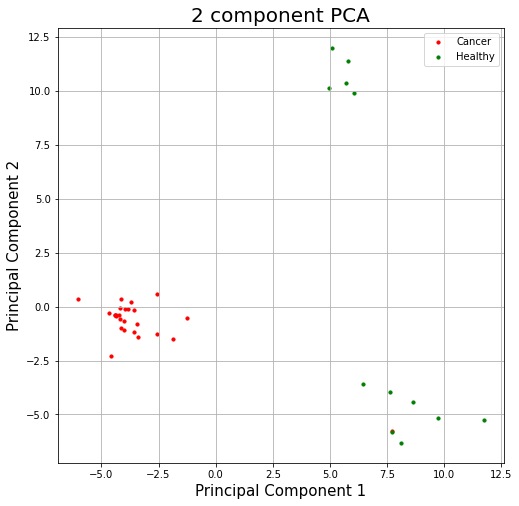

In [667]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [668]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [669]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


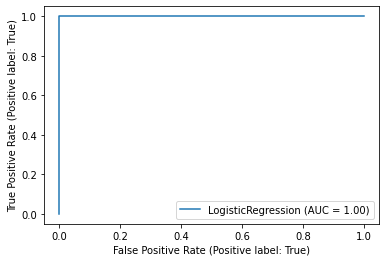

In [670]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [671]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[16:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


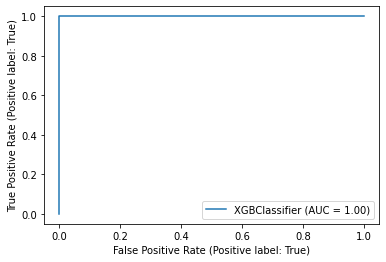

In [672]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [673]:
mirnas[:10]

2       hsa-let-7a-5p
4       hsa-let-7b-5p
6       hsa-let-7c-5p
7       hsa-let-7d-3p
8       hsa-let-7d-5p
10      hsa-let-7e-5p
13      hsa-let-7f-5p
17      hsa-let-7i-5p
33     hsa-miR-10b-5p
42    hsa-miR-1224-5p
Name: miRNA, dtype: object

In [674]:
from Scripts import converters

In [675]:
sequences = converters.canonical_to_seq(mirnas)

In [676]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = sick
norm_log_table.head()

,UGAGGUAGUAGGUUGUAUAGUU,UGAGGUAGUAGGUUGUGUGGUU,UGAGGUAGUAGGUUGUAUGGUU,CUAUACGACCUGCUGCCUUUCU,AGAGGUAGUAGGUUGCAUAGUU,UGAGGUAGGAGGUUGUAUAGUU,UGAGGUAGUAGAUUGUAUAGUU,UGAGGUAGUAGUUUGUGCUGUU,UACCCUGUAGAACCGAAUUUGUG,GUGAGGACUCGGGAGGUGG,...,UGAGUGUGUGUGUGUGAGUGUGU,AAUGGCGCCACUAGGGUUGUG,UACCCAUUGCAUAUCGGAGUUG,UGCGGGGCUAGGGCUAACAGCA,CGGCUCUGGGUCUGUGGGGA,AGGUUGGGAUCGGUUGCAAUGCU,UAUUGCACUUGUCCCGGCCUGU,AUAAAGCUAGAUAACCGAAAGU,CACCCGUAGAACCGACCUUGCG,cancer
CON-1,0.040279,-3.140074,0.072576,-0.181634,-0.063617,0.158484,0.081079,-0.733858,0.072273,-0.133160,...,1.823345,0.026351,-0.020863,1.145474,-0.130536,2.540363,0.391868,0.014225,0.973773,0
CON-2,0.006628,-3.140074,0.042485,0.075964,0.100185,0.129503,0.070968,-0.079899,0.056648,-0.538035,...,1.615545,-0.285721,0.085677,1.061012,-0.911688,2.261462,-0.001811,-0.804050,1.189003,0
CON-3,-0.040793,-3.140074,-0.076714,-0.147588,-0.132812,0.085325,0.170865,-0.277612,0.109944,-0.190510,...,1.697424,0.184386,0.275278,1.197082,-0.252979,2.476069,0.428223,0.196178,1.221806,0
CON-4,0.237022,-3.140074,0.082037,0.152441,0.366979,0.327455,0.348120,0.089775,0.068257,-0.458469,...,1.915532,-0.198384,-0.035821,1.079533,-0.751962,2.378219,0.114172,-3.461677,0.963534,0
CON-5,0.094347,-0.332516,0.635575,0.132583,0.292809,0.221995,0.255931,-0.003417,0.105131,-0.312276,...,1.846475,-0.200565,-3.403943,1.031467,-0.522697,-1.364565,-0.126631,-0.581574,1.065005,0


In [677]:
norm_log_table.to_csv(f"../TransformedData/Jin2017_threshold_{threshold}.csv", index=False)